In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("DatosLimpios_AllFeatures.xlsx", names=['rang1', 'rang2', 'rang3', 'rang4','rang5', 'Femenino', 'Masculino', 'Animado', 'Confiable', 'Extravertido', 'Responsable', 'Serio','estilo'])
df

,rang1,rang2,rang3,rang4,rang5,Femenino,Masculino,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,0,1,0,0,0,0,1,1,0,0,0,0,1
6,0,1,0,0,0,0,1,0,0,0,1,0,1
11,0,0,0,0,1,1,0,0,0,0,0,1,1
12,0,0,1,0,0,0,1,0,0,0,0,1,1
13,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0,0,0,1,0,1,0,0,0,0,1,0,0
2200,0,0,0,0,1,0,1,0,1,0,0,0,0
2201,1,0,0,0,0,1,0,1,0,0,0,0,1
2204,0,0,1,0,0,0,1,1,0,0,0,0,1


In [ ]:
df

,rang1,rang2,rang3,rang4,rang5,Femenino,Masculino,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,0,1,0,0,0,0,1,1,0,0,0,0,1
6,0,1,0,0,0,0,1,0,0,0,1,0,1
11,0,0,0,0,1,1,0,0,0,0,0,1,1
12,0,0,1,0,0,0,1,0,0,0,0,1,1
13,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0,0,0,1,0,1,0,0,0,0,1,0,0
2200,0,0,0,0,1,0,1,0,1,0,0,0,0
2201,1,0,0,0,0,1,0,1,0,0,0,0,1
2204,0,0,1,0,0,0,1,1,0,0,0,0,1


In [ ]:
dataset = df.values
X = dataset[:, :-1]
y=dataset[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1200, alpha=0.0001,
                  solver='adam', random_state=21, tol=0.000000001)
#mlp = MLPClassifier(hidden_layer_sizes=(5,5,5,5), max_iter=5000)
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61       116
           1       0.61      0.77      0.68       109

    accuracy                           0.65       225
   macro avg       0.66      0.65      0.65       225
weighted avg       0.66      0.65      0.64       225



In [ ]:
print("precisión entranamiento: {0: .2f}".format(
        mlp.score(X_train, y_train)))

precisión entranamiento:  0.75


In [ ]:
print("precisión entranamiento: {0: .2f}".format(
        mlp.score(X_test, y_test)))

precisión entranamiento:  0.65


In [ ]:
from sklearn.model_selection import cross_val_score 

In [ ]:
a = cross_val_score(mlp, X_train, y_train, cv = 5, scoring="accuracy")
a.mean()

0.706043956043956

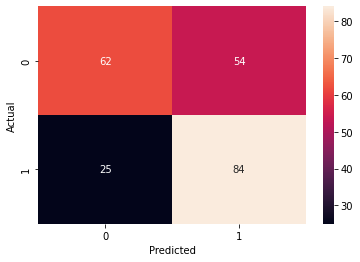

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn import svm
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
### Evaluate the model

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test,predictions))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, predictions))

Accuracy: 0.6488888888888888
Precision: 0.6086956521739131
Recall: 0.7706422018348624


In [ ]:
X_new = pd.DataFrame({'rang1': [0], 'rang2': [0], 'rang3': [1], 'rang4': [0], 'rang5': [0], 'Femenino': [1], 'Masculino': [0], 'Animado': [0], 'Confiable': [0], 'Extravertido': [0], 'Responsable': [0], 'Serio': [1]})
print("El array 1 corresponde al estilo casual y el 0 corresponde al estilo modesto\n")
print("El estilo de vestir es:", mlp.predict(X_new))

El array 1 corresponde al estilo casual y el 0 corresponde al estilo modesto

El estilo de vestir es: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
